<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Deep_learning_program/Modulo_I/Lab_Regresi%C3%B3n_con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Modelos de Regresión con Keras</font></h1>


## Introducción


Keras es una API de alto nivel para crear modelos de aprendizaje profundo. Ha ganado popularidad por su facilidad de uso y simplicidad sintáctica que facilita el desarrollo rápido. Como verá en este laboratorio y en los otros laboratorios de este curso, la construcción de una red de aprendizaje profundo muy compleja se puede lograr con Keras con solo unas pocas líneas de código. Apreciará Keras aún más, una vez que aprenda a construir modelos profundos usando PyTorch y TensorFlow en los otros módulos.

Entonces, en este laboratorio, aprenderá a usar la biblioteca de Keras para construir un modelo de regresión.

<h2>Modelos de regresión con Keras</h2>

<h3>Objetivo de este Notebook</h3>    
<h5> 1. Como usar Keras y construir un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Construir una red Neuronal </h5>
<h5> 4. Entrenar y Testear una Red. </h5>     


## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Descargar y limpiar el Dataset</a>  
2. <a href="#item32">Importar Keras</a>  
3. <a href="#item33">Construir una Red Neuronal</a>  
4. <a href="#item34">Entrenar y Testear la Red</a>  

</font>
</div>


<a id="item31"></a>


## Descargar y limpiar Dataset


Comencemos importando las bibliotecas <em>pandas</em> y <em>Numpy</em>.


In [2]:
import pandas as pd
import numpy as np

<strong>El conjunto de datos trata sobre la resistencia a la compresión de diferentes muestras de hormigón en función de los volúmenes de los diferentes ingredientes que se utilizaron para fabricarlas. Los ingredientes incluyen:</strong>

<strong>1. Cemento</strong>

<strong>2. Escoria de alto horno</strong>

<strong>3. Cenizas volantes</strong>

<strong>4. Agua</strong>

<strong>5. Superplastificante</strong>

<strong>6. Agregado grueso</strong>

<strong>7. Agregado fino</strong>

Descarguemos los datos y leamos en un dataframe de <em>pandas</em>.


In [ ]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head(10)

Así que la primera muestra de hormigón tiene 540 metros cúbicos de cemento, 0 metros cúbicos de escoria de alto horno, 0 metros cúbicos de cenizas volantes, 162 metros cúbicos de agua, 2,5 metros cúbicos de superplaticizador, 1040 metros cúbicos de agregado grueso, 676 metros cúbicos de agregado fino. Una mezcla de hormigón de este tipo, que tiene 28 días, tiene una resistencia a la compresión de 79,99 MPa.


#### Comprobemos cuántos datos tenemos.


In [4]:
concrete_data.shape

(1030, 9)

Entonces, hay aproximadamente 1000 muestras para entrenar nuestro modelo. Debido a las pocas muestras, debemos tener cuidado de no sobreajustar los datos de entrenamiento.


Revisemos el conjunto de datos en busca de <strong>missings.</strong>


In [5]:
concrete_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
concrete_data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [15]:
resume = concrete_data.describe().transpose()
resume['RIC'] = resume['75%'] - resume['25%']
resume['LI'] = resume['25%'] - 1.5*resume['RIC']
resume['LS'] = resume['75%'] + 1.5*resume['RIC']
resume

,count,mean,std,min,25%,50%,75%,max,RIC,LI,LS
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,157.625,-44.0625,586.4375
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,142.950,-214.4250,357.3750
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,118.300,-177.4500,295.7500
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,27.100,124.2500,232.6500
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,10.200,-15.3000,25.5000
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,97.400,785.9000,1175.5000
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,93.050,591.3750,963.5750
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,49.000,-66.5000,129.5000
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,22.425,-9.9275,79.7725


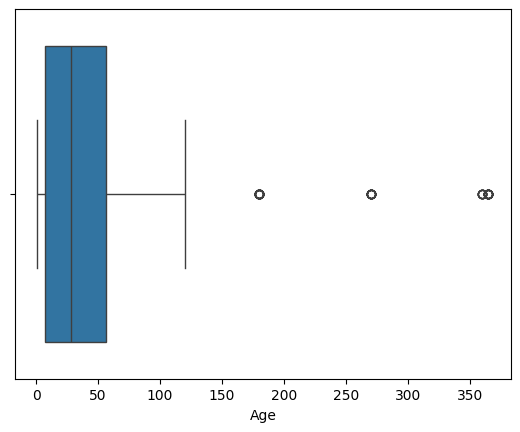

In [23]:
# prompt: grafica un boxplot del dataset concrete_data en la variable Superplasticizer
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = concrete_data['Age'])
plt.show()

In [24]:
concrete_data.columns.tolist()

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age',
 'Strength']

In [37]:
resume.loc[resume.index == col].LS.values[0]

79.77250000000001

In [25]:

# prompt: acota una columna de pandas usando clipping

for col in concrete_data.columns.tolist():
  desc = resume.loc[resume.index == col]

  lower_limit = desc.LI.values[0]
  upper_limit = desc.LS.values[0]

  concrete_data[col] = concrete_data[col].clip(lower=lower_limit, upper=upper_limit)


<Axes: xlabel='Age'>

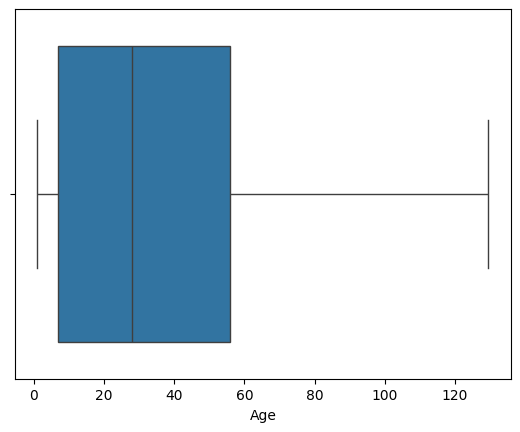

In [27]:
sns.boxplot(x = concrete_data['Age'])

Los datos se ven muy limpios y están listos para usarse para construir nuestro modelo.

#### Dividir los datos en predictores y target


La variable objetivo en este problema es la resistencia de la muestra de hormigón. Por lo tanto, nuestros predictores serán todas las demás columnas.

In [28]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # todas las columnas excepto Strength
target = concrete_data['Strength'] # Columna Strength


Hagamos una comprobación rápida de la coherencia de los predictores y el target del dataframe.


In [29]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5


In [30]:
target.head()

,Strength
0,79.7725
1,61.8900
2,40.2700
3,41.0500
4,44.3000


Finalmente, el último paso es normalizar los datos restando la media y dividiendo por la desviación estándar.

In [31]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856555,-0.846733,-0.920763,-0.630600,0.862735,-1.220813,-0.281435
1,2.476712,-0.856555,-0.846733,-0.920763,-0.630600,1.055651,-1.220813,-0.281435
2,0.491187,0.795305,-0.846733,2.188770,-1.061452,-0.526262,-2.248185,2.555165
3,0.491187,0.795305,-0.846733,2.188770,-1.061452,-0.526262,-2.248185,2.555165
4,-0.790075,0.678226,-0.846733,0.492661,-1.061452,0.070492,0.652261,2.555165


Guardemos el número de predictores en _n_cols_ ya que necesitaremos este número al construir nuestra red.


<Axes: >

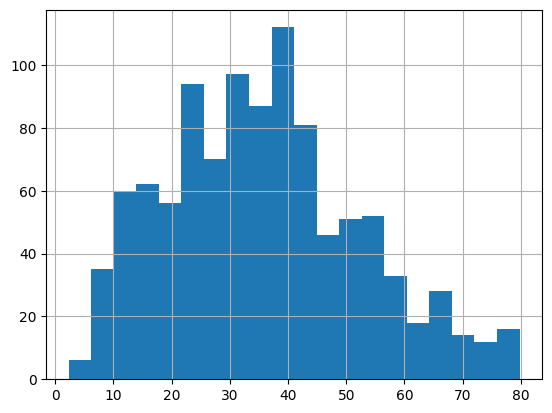

In [41]:
concrete_data['Strength'].hist(bins=20)

In [42]:
n_cols = predictors_norm.shape[1] # número de predictores

In [43]:
n_cols

8

<a id='item32'></a>


## Importar Keras


Keras normalmente ejecuta sobre una biblioteca de bajo nivel como TensorFlow. Esto significa que para poder usar la biblioteca de Keras, primero deberá instalar TensorFlow y cuando importe la biblioteca de Keras, se mostrará explícitamente qué backend se usó para instalar la biblioteca de Keras. Usamos TensorFlow como backend para instalar Keras, por lo que debería imprimirlo claramente cuando importamos Keras.




#### Vamos a importar la biblioteca de Keras


In [46]:
from tensorflow import keras
import tensorflow as tf

Como puede ver, el backend de TensorFlow se usó para instalar la biblioteca de Keras.


Importemos el resto de los paquetes de la biblioteca de Keras que necesitaremos para construir nuestro modelo de regresión.

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

# Definido el modelo

model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_cols, )))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss = "mean_squared_error", optimizer = "sgd")


In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

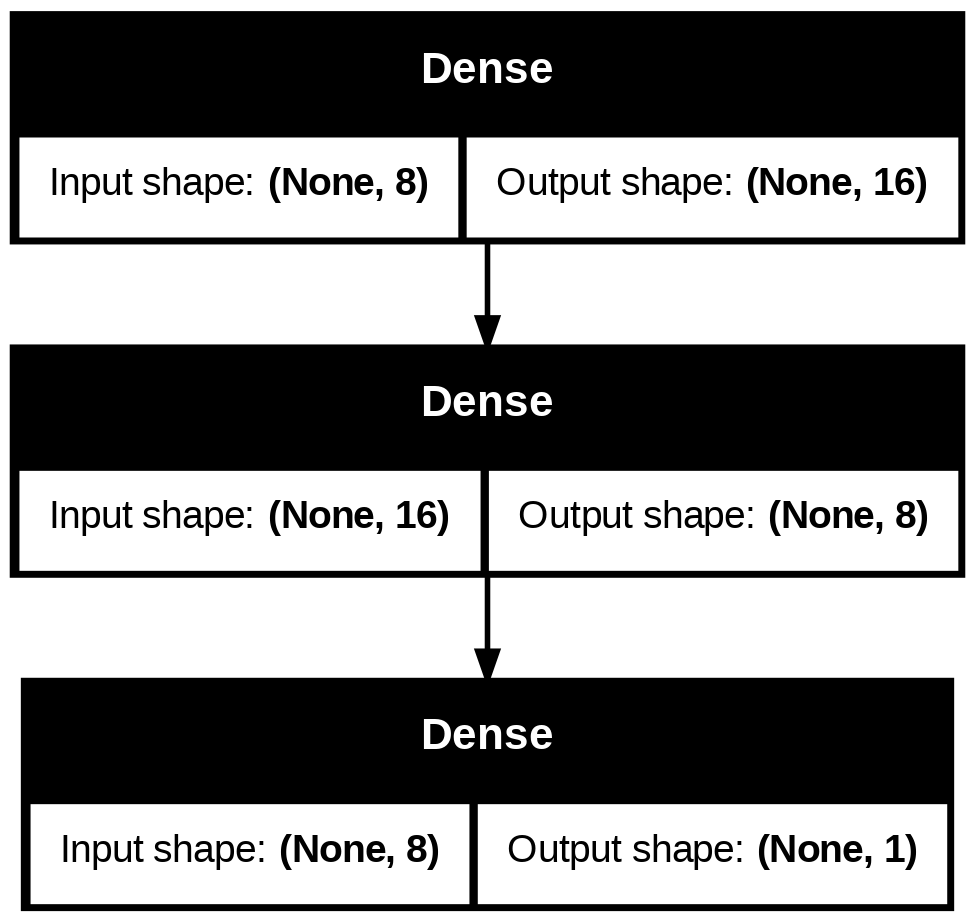

In [52]:
keras.utils.plot_model(model, show_shapes=True)

In [53]:
history = model.fit(predictors_norm, target, epochs = 30, validation_split = 0.3, verbose = 1)


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2169.5305 - val_loss: 742.3926
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 935.4557 - val_loss: 353.9200
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 564.1299 - val_loss: 222.5883
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 433.0696 - val_loss: 185.8357
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 371.4236 - val_loss: 180.8346
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 314.2823 - val_loss: 184.8298
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 324.2084 - val_loss: 190.3156
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 313.7263 - val_loss: 194.9053
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301.5578 - val_loss: 197.6080
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301.8495 - val_loss: 200.5021
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 302.9326 - val_loss: 201.4445
Epoch 12/30
23/23 ━━━━━━━━━━

(0.0, 2000.0)

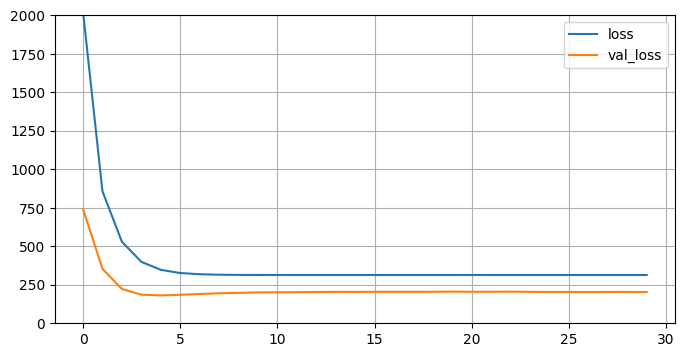

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 4))
plt.grid(True)
plt.gca().set_ylim(0, 2000) # set the vertical range to [0-1] plt.show()

<a id='item33'></a>


## Contruir una Red Neuronal

Definamos una función que defina nuestro modelo de regresión para que podamos llamarlo convenientemente para crear nuestro modelo.

In [ ]:
# definir el modelo de regresión
def regression_model():
    # crear el modelo
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    # compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

La función anterior crea un modelo que tiene dos capas ocultas, cada una de 50 unidades ocultas.

<a id="item4"></a>


## Entrenar y Testear la Red


Llamemos a la función ahora para crear nuestro modelo.

In [ ]:
# contruir el modelo
model = regression_model()

A continuación, entrenaremos y probaremos el modelo al mismo tiempo usando el método _fit_. Dejaremos fuera el 30% de los datos para su validación y entrenaremos el modelo para 100 epochs.


In [ ]:
# entrenar el modelo
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(16, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1200) # set the vertical range to [0-1] plt.show()

<strong>Puede consultar este [link](https://keras.io/models/sequential?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) para aprender sobre otra funciones que puede utilizar para la predicción o la evaluación.</strong>


Siéntase libre de variar lo siguiente y observe qué impacto tiene cada cambio en el rendimiento del modelo:

1. Incrementar o disminuir la cantidad de neuronas en capas ocultas
2. Agrega más capas ocultas
3. Incrementar el número de epochs

In [ ]:
pd.DataFrame(target).hist()

In [ ]:
pd.DataFrame(model.predict(predictors_norm)).hist()

In [ ]:
concrete_data['prediction'] = model.predict(predictors_norm)


In [ ]:
concrete_data[['Strength','prediction']].corr()

In [ ]:
0.77656**2

In [ ]:
from sklearn.metrics import r2_score


r2_score(concrete_data.Strength, concrete_data.prediction)


### ¡Gracias por completar este laboratorio!



In [ ]:
# definir el modelo de regresión
def regression_model():
    # crear el modelo
    model = Sequential()
    model.add(Dense(18, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(18, activation='sigmoid'))
    model.add(Dense(9,  activation='sigmoid'))
    model.add(Dense(1))

    # compilar el modelo
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model




In [ ]:
# contruir el modelo
model = regression_model()

# entrenar el modelo
model.fit(predictors_norm, target, validation_split=0.3, epochs=200, verbose=2)